In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


C:\Users\Win 10\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('heart_diagnose.csv')
df.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


In [4]:
df.shape

(270, 14)

### dataset has 270 rows and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

as we can see columns 
* pain type with 4 categories:
 * 1.one 2.two 3.three 4.four
* thal with 3 categories:
 * 1.normal 2.reversable 3.fixed

are objects so we should use one-hot encoder for them.

In [6]:
df['pain type'].value_counts()

four     129
three     79
two       42
one       20
Name: pain type, dtype: int64

In [7]:
df['thal'].value_counts()

normal               152
reversable defect    104
fixed defect          14
Name: thal, dtype: int64

In [8]:
df.isnull().sum()

age                                     0
sex                                     0
pain type                               0
resting blood pressure                  0
cholestoral                             0
fasting blood sugar                     0
resting electrocardiographic results    0
maximum heart rate                      0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
num of major vessels                    0
thal                                    0
heart disease                           0
dtype: int64

### as we can see there is no null value in our dataset

### Question2
Convert category fields to numeric fields by one-hot method

In [9]:
df = pd.get_dummies(df)

In [10]:
df.head()

,age,sex,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease,pain type_four,pain type_one,pain type_three,pain type_two,thal_fixed defect,thal_normal,thal_reversable defect
0,70,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,1,1,0,0,0,0,1,0
1,67,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,0,0,0,1,0,0,0,1
2,57,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1,0,0,0,1,0,0,1
3,64,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0,1,0,0,0,0,0,1
4,74,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0,0,0,0,1,0,1,0


### Question3
Reduce the number of features to two using the pca function from the sklearn library, save it in a separate data frame and use it later.

In [11]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

### Question4
For values of k from 1 to 20, run the K-means algorithm and draw the SSE graph in terms of k. Based on the elbow method, tell which k is more suitable

In [43]:
def plot_elbow(df):
    Sum_of_squared_distances = []    
    K = range(1,20)
    for num_clusters in K:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        Sum_of_squared_distances.append(kmeans.inertia_)
        
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


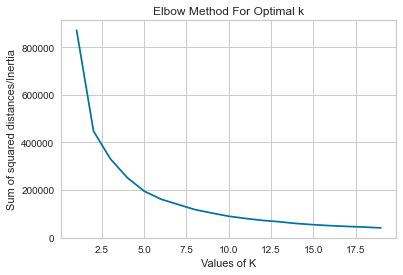

In [44]:
plot_elbow(df_pca)

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


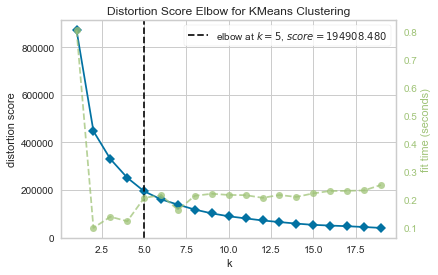

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(1,20))
distortion_visualizer.fit(df_pca)       
distortion_visualizer.show()   

### result
best k based on elbow visualizer is k=5

### Question5
* For values from 2 to 20, obtain the silhouette criteria with the K-means method.
* Draw a bar graph of the silhouette benchmark based on k.
* Also get the best k at this stage.

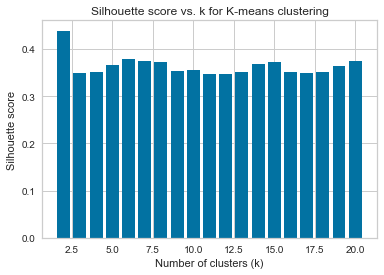

The best value of k based on the highest silhouette score is 2.


In [35]:
# Initialize the arrays to store silhouette scores and best k
silhouette_scores = []
best_k = None
best_silhouette_score = -1

# Loop over possible values of k (from 2 to 20)
for k in range(2, 21):
    # Perform K-means clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_pca)
    # Calculate the silhouette score for the current value of k
    silhouette = silhouette_score(df_pca, kmeans.labels_)
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette)
    # Check if this is the best silhouette score so far
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_k = k

# Plot the silhouette scores in a bar graph
plt.bar(range(2, 21), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. k for K-means clustering')
plt.show()

# Print the best value of k based on the highest silhouette score
print(f'The best value of k based on the highest silhouette score is {best_k}.')

In [36]:
def plot_silhouette(df):
    range_n_clusters = range(2,20)
    silhouette_avg = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_        
        silhouette_avg.append(silhouette_score(df, cluster_labels))
        
    plt.plot(range_n_clusters,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

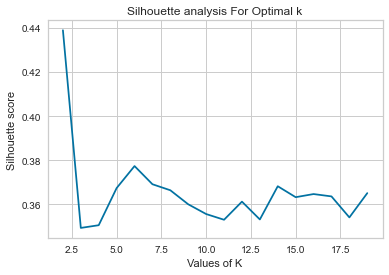

In [37]:
plot_silhouette(df_pca)

### Result:
We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters.

### Question6
Perform clustering for the best k that you obtained in parts 4 and 5 and show the result using a scatter plot.

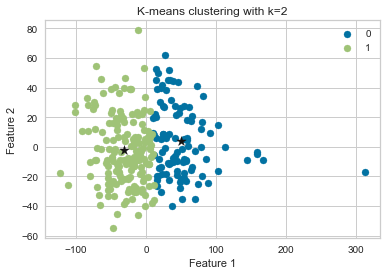

In [41]:
kmeans_elbow = KMeans(n_clusters =2, random_state=42).fit(df_pca)
labels_elbow = kmeans_elbow.fit_predict(df_pca)

# centroids = kmeans_elbow.cluster_centers_
# u_labels = np.unique(labels_elbow)

#plotting the results:
 
for i in u_labels:
    plt.scatter(df_pca[labels_elbow == i , 0] , df_pca[labels_elbow == i , 1] , label= i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k',marker='*')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means clustering with k={best_k}')
plt.show()

# Plot the results using a scatter plot
# plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_elbow.labels_, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans_elbow.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='k')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title(f'K-means clustering with k={best_k}')
# plt.show()

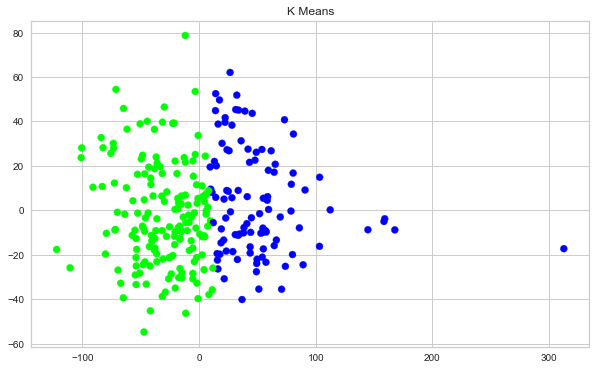

In [42]:
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_pca[:,0],df_pca[:,1],c=kmeans_elbow.labels_,cmap='brg')

In [46]:
kmeans_silhouette = KMeans(n_clusters =5, random_state=42).fit(df_pca)
labels_silhouette = kmeans_silhouette.fit_predict(df_pca)

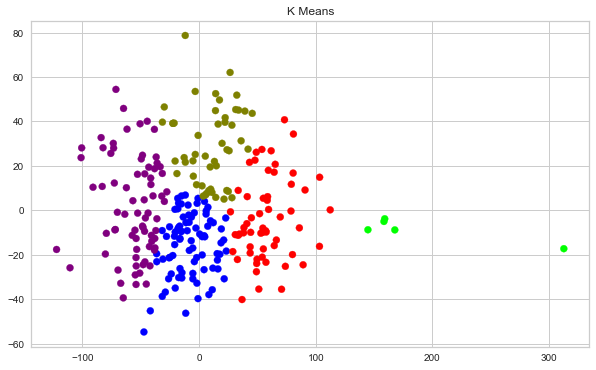

In [47]:
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_pca[:,0],df_pca[:,1],c=kmeans_silhouette.labels_,cmap='brg')

### Question7
For each of the clusters obtained with the best K value in section 6, call the describe function and describe it

## Analisis for k=2 which is obtained from elbow method

In [48]:
pd.DataFrame(df_pca[labels_elbow==0]).describe()

,0,1
count,102.000000,102.000000
mean,50.714153,3.880222
std,41.484417,23.695028
min,9.486397,-40.189482
25%,23.751204,-14.356583
50%,43.461227,-1.124444
75%,59.480235,21.341763
max,312.592009,62.023031


In [49]:
pd.DataFrame(df_pca[labels_elbow==1]).describe()

,0,1
count,168.000000,168.000000
mean,-30.790736,-2.355849
std,27.617770,23.176315
min,-122.176719,-54.791139
25%,-47.950611,-19.590205
50%,-26.921250,-6.363305
75%,-8.868877,11.516174
max,11.794378,78.666980


### Results:
we have 2 clusters

## Anaylis k=5

In [51]:
pd.DataFrame(df_pca[labels_silhouette==0]).describe()

,0,1
count,84.000000,84.000000
mean,-8.043799,-15.517586
std,16.220620,13.831447
min,-47.308944,-54.791139
25%,-18.277541,-26.100138
50%,-9.209737,-12.867768
75%,4.341059,-5.554278
max,23.292969,6.836460


In [52]:
pd.DataFrame(df_pca[labels_silhouette==1]).describe()

,0,1
count,73.000000,73.000000
mean,-56.183450,1.810479
std,19.722106,22.151302
min,-122.176719,-39.451725
25%,-69.496643,-16.358216
50%,-50.860622,-1.262276
75%,-41.506649,19.384266
max,-27.683601,54.390908


In [53]:
pd.DataFrame(df_pca[labels_silhouette==2]).describe()

,0,1
count,58.000000,58.000000
mean,58.022150,-3.980668
std,19.454479,18.392241
min,26.881270,-40.189482
25%,43.874666,-17.172649
50%,54.835363,-7.981576
75%,68.720716,8.225173
max,112.351814,40.723184


In [54]:
pd.DataFrame(df_pca[labels_silhouette==3]).describe()

,0,1
count,50.000000,50.000000
mean,9.385983,28.920174
std,19.525374,17.314335
min,-31.453592,5.010059
25%,-3.331905,12.455451
50%,12.070958,27.020498
75%,23.850818,41.170962
max,45.514881,78.666980


In [55]:
pd.DataFrame(df_pca[labels_silhouette==4]).describe()

,0,1
count,5.000000,5.000000
mean,188.497432,-8.763527
std,69.859889,5.265493
min,144.681409,-17.296664
25%,158.410367,-8.852165
50%,159.072480,-8.783855
75%,167.730897,-5.049116
max,312.592009,-3.835837


In [67]:
# Analyze the result with describe method for each cluster
for i in range(2):
    cluster_data = df_pca[labels_elbow == i]
    print(f"Cluster {i} Statistics:")
    print(pd.DataFrame(cluster_data).describe())
    print("\n\n")

Cluster 0 Statistics:
                0           1
count  102.000000  102.000000
mean    50.714153    3.880222
std     41.484417   23.695028
min      9.486397  -40.189482
25%     23.751204  -14.356583
50%     43.461227   -1.124444
75%     59.480235   21.341763
max    312.592009   62.023031



Cluster 1 Statistics:
                0           1
count  168.000000  168.000000
mean   -30.790736   -2.355849
std     27.617770   23.176315
min   -122.176719  -54.791139
25%    -47.950611  -19.590205
50%    -26.921250   -6.363305
75%     -8.868877   11.516174
max     11.794378   78.666980





In [63]:
# Analyze the result with describe method for each cluster
for i in range(5):
    cluster_data = df_pca[labels_silhouette == i]
    print(f"Cluster {i} Statistics:")
    print(pd.DataFrame(cluster_data).describe())
    print("\n\n")

Cluster 0 Statistics:
               0          1
count  84.000000  84.000000
mean   -8.043799 -15.517586
std    16.220620  13.831447
min   -47.308944 -54.791139
25%   -18.277541 -26.100138
50%    -9.209737 -12.867768
75%     4.341059  -5.554278
max    23.292969   6.836460



Cluster 1 Statistics:
                0          1
count   73.000000  73.000000
mean   -56.183450   1.810479
std     19.722106  22.151302
min   -122.176719 -39.451725
25%    -69.496643 -16.358216
50%    -50.860622  -1.262276
75%    -41.506649  19.384266
max    -27.683601  54.390908



Cluster 2 Statistics:
                0          1
count   58.000000  58.000000
mean    58.022150  -3.980668
std     19.454479  18.392241
min     26.881270 -40.189482
25%     43.874666 -17.172649
50%     54.835363  -7.981576
75%     68.720716   8.225173
max    112.351814  40.723184



Cluster 3 Statistics:
               0          1
count  50.000000  50.000000
mean    9.385983  28.920174
std    19.525374  17.314335
min   -31.453592 